## Adams-Bashforth Integrators

This is an explicit family of integrators, with general form
$$
y_{n}-y_{n-1}=h\sum_{j=0}^{j=n-1} a_j f(t_j,x_j)
$$.

* They are zero stable, as $p(z)=z^{n}-z^{n-1}$, which has roots of 0 and 1.

* They are explicit methods which are derived by fitting a polynomial interpolant through $f(t_j,x_j)$ and then integrating the interpolant from $t_{n-1}$ to $t_{n}$.  For example, the linear interpolating polynomial of $f$ using the
$t_j$ data is $\sum_{j} f(t_j)\mathcal{l}_j(x)$.

To be more precise,we take the differential equation $y^{\prime}=f(t,y)$, replace $f$ with is polynomial interpolant at point $f_{n-1-s}$ through $f_{n-1}$, and integrate the equation from $t_{n-1}$ to $t_n$.  On the left, you get $y_{n}-y_{n-1}$.  

On the right we get, for example: $$p(t)=f_{n-1}\frac{x-x_{n-1}}{x_{n-1}-x_{n-2}} + f_{n-2} \frac{x-x_{n-2}}{x_{n-2} - x_{n-1}}
$$
For a fixed mesh spacing this simplifies to 
$$
p(t) = {h}^{-1} \left(f_{n-1}(x-x_{n-2})-f_{n-2}(x-x_{n-1}) \right)
$$
$$
\int_{x_{n-1}}^{x_{n}}p(t) \; dt \rightarrow \int_{0}^h f_{n-1}(x+h) -f_{n-2}x \; dx \rightarrow  \frac{3h^2}{2} f_{n-1} - f_{n-2}\frac{h^2}{2}
$$
which simplifies overall to
$$
y_{n}-y_{n-1}=\frac{h}{2}(3f_{n-1} - f_{n-2}).
$$

We now plot its stability region.


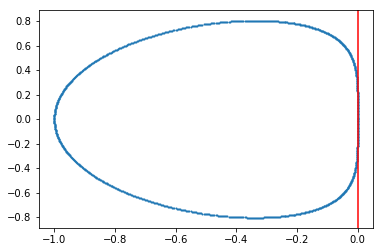

In [5]:
#plot stability region for AB2

import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(0,2*np.pi,1000)
output=(np.exp(2*1j*theta)-np.exp(1j*theta))/(1.5*np.exp(1j*theta)-.5)
plt.scatter(np.real(output),np.imag(output),s=1)
plt.axvline(0,c='r')
plt.show()




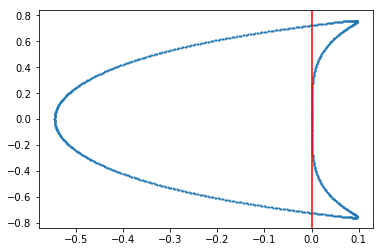

In [6]:
#plot stability region for AB3
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(0,2*np.pi,1000)
output=(np.exp(3*1j*theta)-np.exp(2j*theta))/(23/12*np.exp(2j*theta)-4/3*np.exp(1j*theta)+5/12)
plt.scatter(np.real(output),np.imag(output),s=1)
plt.axvline(0,c='r')
plt.show()


## Adams-Moulton

Adams-Moulton is derived in an identical manner to Adams-Bashforth **except** that the interpolating polyomial of $f$ is constructed using $f(y_n),\ldots,f(y_{n-s})$ instead of
$f(y_{n-1},\ldots,f(y_{n-s})$.  The resulting system is then explicit and will involve a linear algebraic solve for linear problems and some iterative method for nonlinear $f(t,y)$.

AM is automatically zero-stable as its $p(z)$ is identical to Adams-Bashforth.

AM2 is the (implicit) trapezoidal rule, given by:

$$
y_{n}-y_{n-1} = \frac{h}{2} \left(f_{n} + f_{n-1} \right)
$$

We plot the stability region for AM3, which is given by:

$$
y_{n}-y_{n-1} = h \left(5/12f_{n} + 2/3f_{n-1} -1/12f_{n-2} \right)
$$



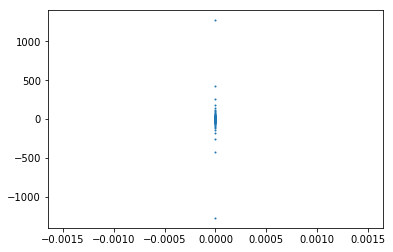

In [13]:
#AM2-implicit trap.
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(0,2*np.pi,1000)  #same numerator as AB3, but denominator will involve z^3
output=(np.exp(2j*theta)-np.exp(1j*theta))/(1/2*np.exp(2j*theta)+1/2*np.exp(1j*theta))
                                                          
plt.scatter(np.real(output),np.imag(output),s=1)
#plt.axvline(0,c='r')
plt.show()

The stability region for AM2 is the entire left half plane.  It is A-Stable, but as a 2-step method does not violate the 2nd Dahlquist barrier.

Note that this expression simplifies to $2(z-1)/(z+1)$ s

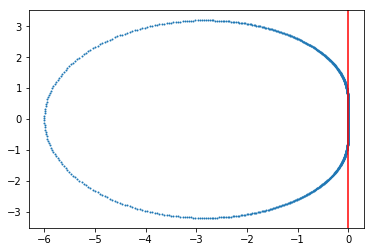

In [14]:
#plot stability region for AM3
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(0,2*np.pi,1000)  #same numerator as AB3, but denominator will involve z^3
output=(np.exp(2j*theta)-np.exp(1j*theta))/(5/12*np.exp(2j*theta)+2/3*np.exp(1j*theta)-1/12)
                                        
plt.scatter(np.real(output),np.imag(output),s=1)
plt.axvline(0,c='r')
plt.show()

## BDF(or Gear) Methods.

These methods are also based on polynomial interpolation.  Instead, we fit $y(t)$ based on unknown $y_n$ data and past data $y_{n-1},y_{n-2},\ldots,y_{n-s}$, compute $y(t)=p(t)$, and use $p^\prime(t)$ as an algebraic expression for $y^\prime(t)$.  The right hand side simply involves the unknown rhs $f(t_n,y_n)$.  Hence these are also implicit methods.

For example, BDF2 would involve fitting a polynomial through $y_{n}$,$y_{n-1}$, and $y_{n-2}$.   Assuming equispaced timesteps, we have
$$
y(t) = y_n l_n(t) + y_{n-1} l_{n-1}(t) + y_{n-2} l_{n-2}(t)
$$
where 
$$
l_n(t) = \frac{(t-t_{n-1})(t- t_{n-2})}{(t_n - t_{n-1})(t_n - t_{n-2})}.
$$
For equi-spaced gridpoints, this simplifies to
$$
l_n(t) = \frac{(t-t_{n-1})(t-t_{n-2})}{2h^2}
$$
Differentiating and evaluating at $t=t_n$ yields 
$$l_n^\prime=\frac{2h+h}{2h^2}\rightarrow \frac{3}{2h}$$

Doing this for all terms yields:

$$
y_{n} - \frac{4}{3}y_{n-1} + \frac{1}{3}y_{n-2} = \frac{2h}{3} f_{t_n,y_n}
$$

We plot its stability region below:


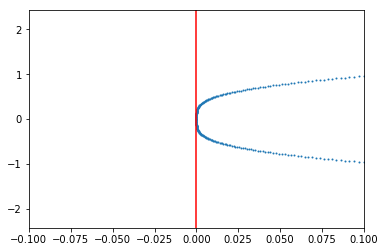

In [23]:
#plot stability region for BF2  (a 2 step method)
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(0,2*np.pi,1000)  #same numerator as AB3, but denominator will involve z^3
output=(np.exp(2*1j*theta)-4/3*np.exp(1j*theta)+1/3)/(2/3*np.exp(2j*theta))
plt.scatter(np.real(output),np.imag(output),s=1)
plt.axvline(0,c='r')
#plt.axis('equal')
plt.xlim(-.1,.1)
#plt.axis('equal')
plt.show()

BDF-2 is A-stable  (it is a "two-step" method), with a stability region extending into the right half plane(which has its own dangers).

BDF-1 is the same as our friend backward Euler.